# TPU Hardware Accelerator

To vastly speed up processing, we can use the TPU available from the Google Colab cloud service.

For a resource on TPUs in Colab, peruse:

https://colab.research.google.com/notebooks/tpu.ipynb

For a simple tutorial, peruse:

https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/classification_iris_data_with_keras.ipynb

For a quick-start guide, peruse:

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/tpu.ipynb

# Import **tensorflow** Library

Import library and alias it:

In [1]:
import tensorflow as tf

 # Enable TPU Runtime
 
It’s very easy to enable the TPU in a Colab notebook:

1.	click **Runtime** in the top left menu
2.	click **Change runtime** type from the drop-down menu
3.	choose **TPU** from the Hardware accelerator drop-down menu
4.	click **SAVE**

# TPU Detection

Set up TPU resolver and verify that it is running:

In [2]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

Running on TPU  ['10.89.139.90:8470']


# Configure TPU

Make devices on the cluster available to use:

In [3]:
tf.config.experimental_connect_to_cluster(tpu)

Initialize TPU devices:

In [4]:
tf.tpu.experimental.initialize_tpu_system(tpu)

INFO:tensorflow:Initializing the TPU system: grpc://10.89.139.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.89.139.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


# Create Strategy

Create a TPU strategy for this notebook:

In [5]:
tpu_strategy = tf.distribute.TPUStrategy(tpu)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Displayed is a list of available TPUs and other devices.

# Manual Device Placement

After the TPU is initialized, we can use manual device placement to direct computation on a single TPU device:

In [6]:
a = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
b = [[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]]
with tf.device('/TPU:7'):
  c = tf.matmul(a, b)
I = [[1.0, 0.0], [0.0, 1.0]]
with tf.device('/TPU:6'):
  d = tf.matmul(c, I)   
print('c device:', c.device)
print(c)
print('d device:', d.device)
print(d)

c device: /job:worker/replica:0/task:0/device:TPU:7
tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32)
d device: /job:worker/replica:0/task:0/device:TPU:6
tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32)


Multiply matrix a by matrix b and place the result in matrix c within the scope of TPU 7. Next, multiply matrix c by the Identity matrix and place the result in matrix d within the scope of TPU 6.

# Run a Computation in all TPU Cores

To replicate a computation so it can run in all TPU cores, pass it to the *strategy.run* API:

In [7]:
@tf.function
def matmul_fn(x, y):
  z = tf.matmul(x, y)
  return z

z = tpu_strategy.run(matmul_fn, args=(a, b))
print(z)

PerReplica:{
  0: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  1: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  2: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  3: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  4: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  5: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  6: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32),
  7: tf.Tensor(
[[ 58.  64.]
 [139. 154.]], shape=(2, 2), dtype=float32)
}


Create a function that multiplies two matrices. If eager behavior is enabled, make the function a `tf.function` or call `strategy.run` inside a `tf.function`. As of this writing, eager behavior is automatically enabled in Colab!

Invoke the funciton with our `strategy.run` and all the cores obtain the same inputs (a, b) and do the matmul on each core independently. The outputs are the values from all the replicas.

# Digits Data Experiment

The **digits** dataset is embedded in the **sklearn.datasets** package. It consists of 1,797 8x8 grayscale images. Each image is of a hand-written digit from 0-9.

Import libraries:

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load digits data:

In [9]:
digits = load_digits()

## Get Keys

Get keys associated with the dataset:

In [10]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

## Display an Image

Display the first image from the dataset:

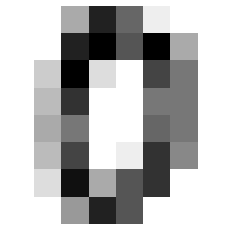

In [11]:
images = digits.images
image = images[0]
fig = plt.imshow(image, cmap='binary')
fig = plt.axis('off')

## Create a Function to Preprocess Data

The function splits the dataset into train and test sets:

In [12]:
def load_data(digits, splits, random, scale):
  X = digits.images
  y = digits.target
  x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=splits, random_state=random)
  x_train, x_test = x_train / scale, x_test / scale
  return (x_train, y_train), (x_test, y_test)

## Get Data into Train and Test Sets

Split into 2/3 train and 1/3 test:

In [13]:
splits, seed, scale = 0.33, 0, 255.0

(x_train, y_train), (x_test, y_test) = load_data(
    digits, splits, seed, scale)

Get target names and number of classes:

In [14]:
target_names = digits.target_names
num_classes = len(target_names)
num_classes, target_names

(10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Prepare Data for TensorFlow Consumption

Convert dataset to a TensorFlow consumable form:

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test))

Verify data:

In [16]:
for img, lbl in train_dataset.take(1):
  print (img.shape, lbl)

(8, 8) tf.Tensor(8, shape=(), dtype=int64)


## Build the Input Pipeline

Set batch and shuffle size. Build the pipeline:

In [17]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_ds = train_dataset\
 .shuffle(SHUFFLE_BUFFER_SIZE)\
 .batch(BATCH_SIZE)
test_ds = test_dataset.batch(BATCH_SIZE)

Get input shape:

In [19]:
for item in train_ds.take(1):
  s = item[0].shape
in_shape = s[1:]
in_shape

TensorShape([8, 8])

## Build Model

Import libraries:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Create a function to build the model:

In [21]:
def get_model():
  return tf.keras.Sequential([
    Flatten(input_shape=in_shape),
    Dense(256, input_shape=in_shape, activation='relu'),
    Dense(num_classes, activation='softmax')])

Create the model and compile within the TPU scope:

In [22]:
with tpu_strategy.scope():
  model = get_model()
  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

Creating the model in the TPUStrategy scope means we train the model on the TPU.

Inspect the model:

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 19,210
Trainable params: 19,210
Non-trainable params: 0
_________________________________________________________________


## Train Model

Train the model for sixty epochs:

In [24]:
epochs = 60
history = model.fit(train_ds, epochs=epochs,
                    validation_data=(test_ds))

Epoch 1/60
19/19 [==============================] - 5s 160ms/step - loss: 2.2880 - accuracy: 0.3132 - val_loss: 2.2603 - val_accuracy: 0.3535
Epoch 2/60
19/19 [==============================] - 1s 61ms/step - loss: 2.2399 - accuracy: 0.4740 - val_loss: 2.2107 - val_accuracy: 0.5067
Epoch 3/60
19/19 [==============================] - 1s 66ms/step - loss: 2.1802 - accuracy: 0.6019 - val_loss: 2.1442 - val_accuracy: 0.6010
Epoch 4/60
19/19 [==============================] - 1s 58ms/step - loss: 2.1038 - accuracy: 0.6935 - val_loss: 2.0576 - val_accuracy: 0.6835
Epoch 5/60
19/19 [==============================] - 1s 57ms/step - loss: 2.0029 - accuracy: 0.7468 - val_loss: 1.9499 - val_accuracy: 0.7189
Epoch 6/60
19/19 [==============================] - 1s 60ms/step - loss: 1.8856 - accuracy: 0.7739 - val_loss: 1.8259 - val_accuracy: 0.7458
Epoch 7/60
19/19 [==============================] - 1s 58ms/step - loss: 1.7477 - accuracy: 0.7883 - val_loss: 1.6923 - val_accuracy: 0.7475
Epoch 8/60
1

# MNIST Experiment

Load MNIST train and test sets as TFDS objects:

In [25]:
import tensorflow_datasets as tfds

train, info = tfds.load(name='mnist', split='train',
                        as_supervised=True, try_gcs=True,
                        with_info=True, shuffle_files=True)
test = tfds.load(name='mnist', split='test',
                        as_supervised=True, try_gcs=True)

## Get Metadata

Display information about the dataset with the **info** object:

In [26]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

## Get Number of Images and Classes

Number of images:

In [27]:
num_train_img = info.splits['train'].num_examples
num_test_img = info.splits['test'].num_examples
print ('train images:', num_train_img)
print ('test images:', num_test_img)

train images: 60000
test images: 10000


Number of classes:

In [28]:
mnist_classes = info.features['label'].num_classes
mnist_classes

10

## Display Examples

Display some examples with the **show_examples** function:

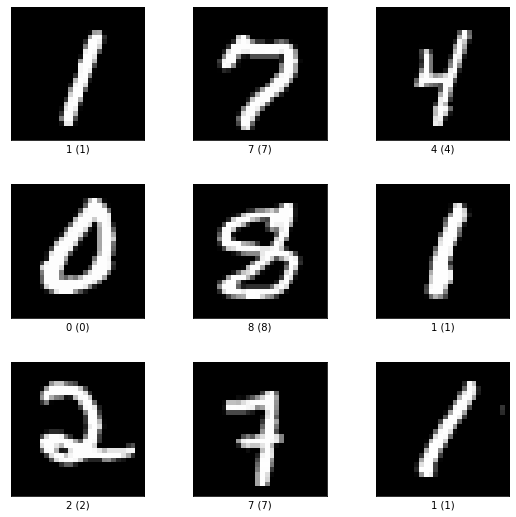

In [29]:
fig = tfds.show_examples(train, info)

## Create Scaling Function

Create a function that scales TFDS data:

In [30]:
def scale(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

## Build the Input Pipeline

In [31]:
BATCH_SIZE = 200
SHUFFLE_SIZE = 10000

train_dataset = train.map(scale)\
  .shuffle(SHUFFLE_SIZE).repeat()\
  .batch(BATCH_SIZE).prefetch(1)
test_dataset = test.map(scale)\
  .batch(BATCH_SIZE).prefetch(1)

Only shuffle and **repeat** the training dataset. The advantage to an infinite dataset for training is to avoid the potential last partial batch in each epoch, so users don't need to think about scaling the gradients based on the actual batch size.

## Create Step Size

When repeating data, include the steps per epoch and validation steps:

In [32]:
steps_per_epoch = num_train_img // BATCH_SIZE
validation_steps = num_test_img // BATCH_SIZE
steps_per_epoch, validation_steps

(300, 50)

## Build Model

Get input shape:

In [33]:
for item in train_dataset.take(1):
  s = item[0].shape
mnist_shape = s[1:]
mnist_shape

TensorShape([28, 28, 1])

Create function that builds the model:

In [34]:
def create_model():
  return Sequential([
    Flatten(input_shape=mnist_shape),
    Dense(512, activation='relu'),
    Dense(mnist_classes, activation='softmax')
    ])

Clear previous models and generate seed:

In [35]:
import numpy as np

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

## Train within TPU Scope

Import library for the loss function:

In [36]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Within TPU strategy scope, create model and compile:

In [37]:
with tpu_strategy.scope():
  model = create_model()
  model.compile(
      optimizer='adam',
      steps_per_execution = 50,
      loss=SparseCategoricalCrossentropy(from_logits=True),
      metrics=['sparse_categorical_accuracy'])

Creating the model in the TPUStrategy scope means we train the model on the TPU.
Experiment with `steps_per_execution`. Anything between 2 and `steps_per_epoch` could help here.

Train:

In [38]:
history = model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps)

Epoch 1/5
300/300 [==============================] - 11s 35ms/step - loss: 0.4252 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.1555 - val_sparse_categorical_accuracy: 0.9551
Epoch 2/5
300/300 [==============================] - 5s 16ms/step - loss: 0.1361 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.1021 - val_sparse_categorical_accuracy: 0.9705
Epoch 3/5
300/300 [==============================] - 5s 16ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.0831 - val_sparse_categorical_accuracy: 0.9744
Epoch 4/5
300/300 [==============================] - 5s 17ms/step - loss: 0.0639 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0735 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/5
300/300 [==============================] - 5s 16ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0730 - val_sparse_categorical_accuracy: 0.9773


# Fashion-MNIST Experiment

**Fashion-MNIST** is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. The dataset is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

Load Fashion-MNIST as a tf.keras dataset:

In [39]:
fashion_train, fashion_test = tf.keras.datasets\
  .fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Create image and label sets:

In [40]:
train_img, train_lbl = fashion_train
test_img, test_lbl = fashion_test

Add color (grayscale) dimension:

In [41]:
fashion_train_img = np.expand_dims(train_img, -1)
fashion_test_img = np.expand_dims(test_img, -1)

Inspect image tensors:

In [42]:
fashion_train_img.shape, fashion_test_img.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Create a function to convert tensors to float:

In [43]:
def float_it(x):
  return x.astype(np.float32)

In [44]:
fash_train_img, fash_train_lbl = float_it(
    fashion_train_img), float_it(train_lbl)
fash_test_img, fash_test_lbl = float_it(
    fashion_test_img), float_it(test_lbl)

## Train with TPU Scope

Import libraries:

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,\
  Conv2D, MaxPooling2D, Dropout

Create a function to build the model:

In [46]:
def create_model():
  return Sequential([
    BatchNormalization(input_shape=(28,28,1)),
    Conv2D(64, (5, 5), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    Dropout(0.25),
    BatchNormalization(),
    Conv2D(128, (5, 5), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    BatchNormalization(),
    Conv2D(256, (5, 5), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),    
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])

Clear and seed:

In [47]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create and compile the model within TPU scope:

In [48]:
with tpu_strategy.scope():
  model = create_model()
  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## Train the Model

Train the model based on Fashion-MNIST data:

In [49]:
history = model.fit(fash_train_img, fash_train_lbl,
    epochs=17, steps_per_epoch=60,
    validation_data=(fash_test_img, fash_test_lbl),
    validation_freq=17)

Epoch 1/17
60/60 [==============================] - 6s 20ms/step - loss: 2.0252 - accuracy: 0.5401
Epoch 2/17
60/60 [==============================] - 1s 20ms/step - loss: 0.5869 - accuracy: 0.8006
Epoch 3/17
60/60 [==============================] - 1s 20ms/step - loss: 0.4531 - accuracy: 0.8441
Epoch 4/17
60/60 [==============================] - 1s 20ms/step - loss: 0.3947 - accuracy: 0.8621
Epoch 5/17
60/60 [==============================] - 2s 25ms/step - loss: 0.3487 - accuracy: 0.8755
Epoch 6/17
60/60 [==============================] - 1s 19ms/step - loss: 0.3184 - accuracy: 0.8881
Epoch 7/17
60/60 [==============================] - 1s 19ms/step - loss: 0.2867 - accuracy: 0.8979
Epoch 8/17
60/60 [==============================] - 1s 19ms/step - loss: 0.2699 - accuracy: 0.8991
Epoch 9/17
60/60 [==============================] - 1s 19ms/step - loss: 0.2555 - accuracy: 0.9068
Epoch 10/17
60/60 [==============================] - 1s 19ms/step - loss: 0.2289 - accuracy: 0.9152
Epoch 11/

Evaluate:

In [50]:
loss, acc = model.evaluate(fash_test_img, fash_test_lbl)
print ('loss:', loss)
print ('accuracy:', acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.2325 - accuracy: 0.9232
loss: 0.23247160017490387
accuracy: 0.9231999516487122


## Save the Trained Model

We can preserve the weights from the trained model:

In [51]:
model.save_weights('./fashion_mnist.h5', overwrite=True)

## Make Inferences

Let’s see how well the model can predict fashion categories!

Get label names:

In [52]:
class_labels = ['t_shirt', 'trouser', 'pullover', 'dress',
                'coat', 'sandal', 'shirt', 'sneaker',
                'bag', 'ankle_boots']

Create a new model from the saved weights of the trained model:

In [53]:
new_model = create_model()
new_model.load_weights('./fashion_mnist.h5')

Get 40 prediction arrays from the test set:

In [54]:
preds = new_model.predict(fash_test_img)[:40]

Transform prediction arrays to predictions:

In [55]:
pred_40 = [tf.argmax(i).numpy() for i in preds]

Get images and labels for display:

In [56]:
images, labels = [], []
for i in range(40):
  img = tf.squeeze(fash_test_img[i])
  images.append(img)
  labels.append(int(fash_test_lbl[i]))

Create a function to display predictions:

In [57]:
def display_test(feature, target, num_images,
                 n_rows, n_cols, cl, p):
  for i in range(num_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plt.imshow(feature[i], cmap='nipy_spectral')
    pred = cl[p[i]]
    actual = cl[int(target[i])]
    title_obj = plt.title(actual + ' (' +\
                          pred + ') ')
    if pred == actual:
      title_obj
    else:
      plt.getp(title_obj, 'text')
      plt.setp(title_obj, color='r')
    plt.tight_layout()
    plt.axis('off')

Invoke the function:

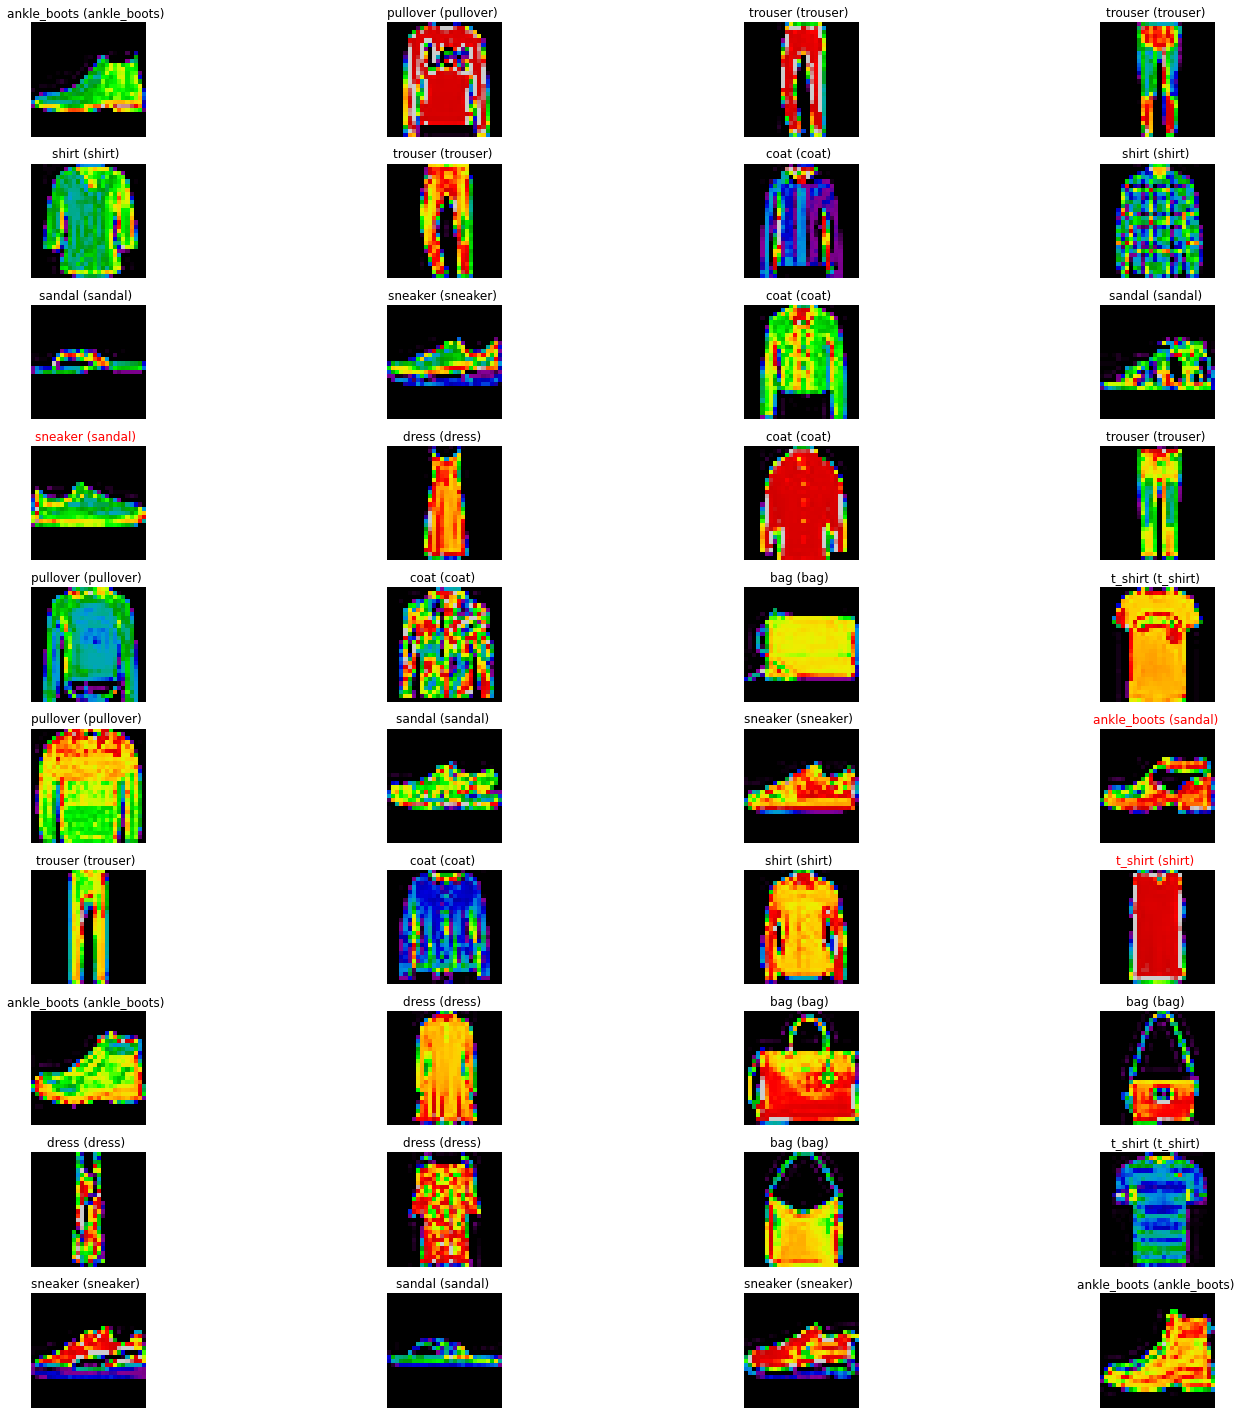

In [58]:
num_rows, num_cols = 10, 4
num_images = num_rows*num_cols
plt.figure(figsize=(20, 20))
display_test(images, labels, num_images, num_rows,
             num_cols, class_labels, pred_40)

# Flowers Experiment

TPUs are very fast. So the training data streaming into the model must keep pace with the training speed of the model to fully leverage the power of TPUs. The preferred method for TPU usage is to store data into the protobuf-based TFRecord format.

The flowers dataset is stored on Google Cloud Storage (GCS). To fully apply the parallelism TPUs offer and to avoid bottlenecking on data transfer, we read data as TFRecord files with approximately 230 images per file. We use tf.data.experimental.AUTOTUNE to optimize different parts of input loading.

A nice site on TPUs in Colab:

https://colab.research.google.com/notebooks/tpu.ipynb

## Read Flowers Data as TFRecord Files

Read TFRecord files:

In [92]:
piece1 = 'gs://flowers-public/'
piece2 = 'tfrecords-jpeg-192x192-2/*.tfrec'
TFR_GCS_PATTERN = piece1 + piece2
tfr_filenames = tf.io.gfile.glob(TFR_GCS_PATTERN)

Get the number of buckets:

In [93]:
num_images = len(tfr_filenames)
print ('Pattern matches {} image buckets.'.format(num_images))

Pattern matches 16 image buckets.


Display all 16 buckets (TFRecord files):

In [94]:
filenames_tfrds = tf.data.Dataset.list_files(TFR_GCS_PATTERN)
for filename in filenames_tfrds.take(16):
  print (filename.numpy())

b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers10-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers04-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers13-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers09-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers15-220.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers14-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers12-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers01-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers03-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers05-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers08-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers07-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers06-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers02-230.tfrec'
b'gs://flowers-public/tfrecords-jpeg-192x192-2/f

## Set Parameters for Training Data

Set parameters for image resizing, pipelining, and number of epochs:

In [95]:
IMAGE_SIZE = [192, 192]
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
SHUFFLE_SIZE = 100
EPOCHS = 9

Set parameters for data splits and labels:

In [96]:
VALIDATION_SPLIT = 0.19
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Create data splits, validation steps, and steps per epoch:

In [97]:
split = int(len(tfr_filenames) * VALIDATION_SPLIT)
training_filenames = tfr_filenames[split:]
validation_filenames = tfr_filenames[:split]
print ('Splitting dataset into {} training files and {} '\
        'validation files'\
       .format(len(tfr_filenames), len(training_filenames),
               len(validation_filenames)), end = ' ')
print ('with a batch size of {}.'.format(BATCH_SIZE))

validation_steps = int(3670 // len(tfr_filenames) *\
                       len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(tfr_filenames) *\
                      len(training_filenames)) // BATCH_SIZE
print ('There are {} batches per training epoch and {} '\
       'batches per validation run.'\
       .format(BATCH_SIZE, steps_per_epoch, validation_steps))

Splitting dataset into 16 training files and 13 validation files with a batch size of 64.
There are 64 batches per training epoch and 46 batches per validation run.


## Create Functions to Load and Process TFRecord Files

Create a function to parse a TFRecord file:

In [98]:
def read_tfrecord(example):
  features = {
      'image': tf.io.FixedLenFeature([], tf.string),
      'class': tf.io.FixedLenFeature([], tf.int64)
  }
  example = tf.io.parse_single_example(example, features)
  image = tf.image.decode_jpeg(example['image'], channels=3)
  image = tf.cast(image, tf.float32) / 255.0 
  image = tf.reshape(image, [*IMAGE_SIZE, 3])
  class_label = example['class']
  return image, class_label

The function accepts an example from a TFRecord file. A dictionary holds datatypes common to TFRecords. The tf.string parameter converts the image to byte strings (list of bytes). The tf.int64 parameter converts the class label to a 64-bit integer scalar value. The example is parsed into (image, label) tuples. The image element, a JPEG-encoded image, is decoded into a uint8 image tensor. The image tensor is scaled to \[0, 1\] range for faster training. It is then reshaped to a standard size for model consumption. The class label element is cast to a scalar. 

Create a function to load TFRecord files as tf.data.Dataset:

In [99]:
def load_dataset(filenames):
  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False
  dataset = tf.data.TFRecordDataset(
      filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

The function accepts TFRecord files. For optimal performance, code is included to read from multiple TFRecord files at once. The options setting allows order-altering optimizations. As such, **n** files are read in parallel and data order is disregarded in favor of reading speed.

Create a function to augment training data:

In [100]:
def data_augment(image, label):
  modified = tf.image.random_flip_left_right(image)
  modified = tf.image.random_saturation(modified, 0, 2)
  return modified, label

Create a function to build an input pipeline from TFRecord files:

In [101]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache()
  if train:
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.repeat()
    dataset = dataset.shuffle(SHUFFLE_SIZE)
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTO)
  return dataset

The function accepts TFRecord files and calls the `load_dataset` function. The function continues by building an input pipeline by caching, repeating, shuffling, batching and prefetching the dataset. Repeating and shuffling are only mapped to training data. We follow best practices by repeating and shuffling only the training data.

## Create Train and Test Sets

Instantiate the datasets:

In [116]:
training_dataset = get_batched_dataset(
    training_filenames, train=True)
validation_dataset = get_batched_dataset(
    validation_filenames, train=False)
training_dataset, validation_dataset

(<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>)

Display an image:

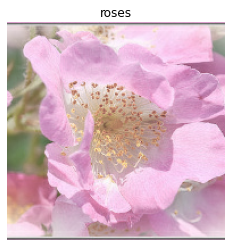

In [117]:
for img, lbl in training_dataset.take(1):
  plt.axis('off')
  plt.title(CLASSES[lbl[0].numpy()])
  fig = plt.imshow(img[0])
  tfr_flower_shape = img.shape[1:]

## Model Data

Clear and seed:

In [118]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create model function:

In [119]:
def create_model():
  return Sequential([
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

Create and compile model within TPU scope:

In [120]:
with tpu_strategy.scope():
  flower_model = create_model()
  flower_model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])

Train model:

In [121]:
history = flower_model.fit(training_dataset, epochs=EPOCHS,
                    verbose=1, steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps, 
                    validation_data=validation_dataset)

Epoch 1/9
46/46 [==============================] - 12s 111ms/step - loss: 1.7187 - accuracy: 0.2568 - val_loss: 1.2507 - val_accuracy: 0.4656
Epoch 2/9
46/46 [==============================] - 2s 51ms/step - loss: 1.2320 - accuracy: 0.4963 - val_loss: 1.1416 - val_accuracy: 0.5094
Epoch 3/9
46/46 [==============================] - 2s 46ms/step - loss: 1.1056 - accuracy: 0.5534 - val_loss: 1.1536 - val_accuracy: 0.5266
Epoch 4/9
46/46 [==============================] - 2s 47ms/step - loss: 1.0709 - accuracy: 0.5902 - val_loss: 0.9405 - val_accuracy: 0.6250
Epoch 5/9
46/46 [==============================] - 2s 46ms/step - loss: 0.9133 - accuracy: 0.6457 - val_loss: 0.9112 - val_accuracy: 0.6438
Epoch 6/9
46/46 [==============================] - 2s 46ms/step - loss: 0.8834 - accuracy: 0.6588 - val_loss: 0.8419 - val_accuracy: 0.6828
Epoch 7/9
46/46 [==============================] - 2s 46ms/step - loss: 0.8290 - accuracy: 0.6793 - val_loss: 0.8763 - val_accuracy: 0.6828
Epoch 8/9
46/46 [=

## Make Inferences

Let’s see how well the model can predict fashion categories!

Grab 40 predictions from the validation (test) set:

In [122]:
preds = flower_model.predict(validation_dataset)[:40]

Convert prediction arrays to scalar prediction values:

In [123]:
pred_40 = [tf.argmax(i).numpy() for i in preds]

Create images and labels for display:

In [124]:
images, labels = [], []
for img, lbl in validation_dataset.take(1):
  for i in range(40):
    actual_img = tf.squeeze(img[i])
    images.append(actual_img)
    labels.append(lbl[i].numpy())

Create a function to display predictions:

In [125]:
def display_test(feature, target, num_images,
                 n_rows, n_cols, cl, p):
  for i in range(num_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plt.imshow(feature[i])
    pred = cl[p[i]]
    actual = cl[int(target[i])]
    title_obj = plt.title(actual + ' (' +\
                          pred + ') ')
    if pred == actual:
      title_obj
    else:
      plt.getp(title_obj, 'text')
      plt.setp(title_obj, color='r')
    plt.tight_layout()
    plt.axis('off')

Invoke function:

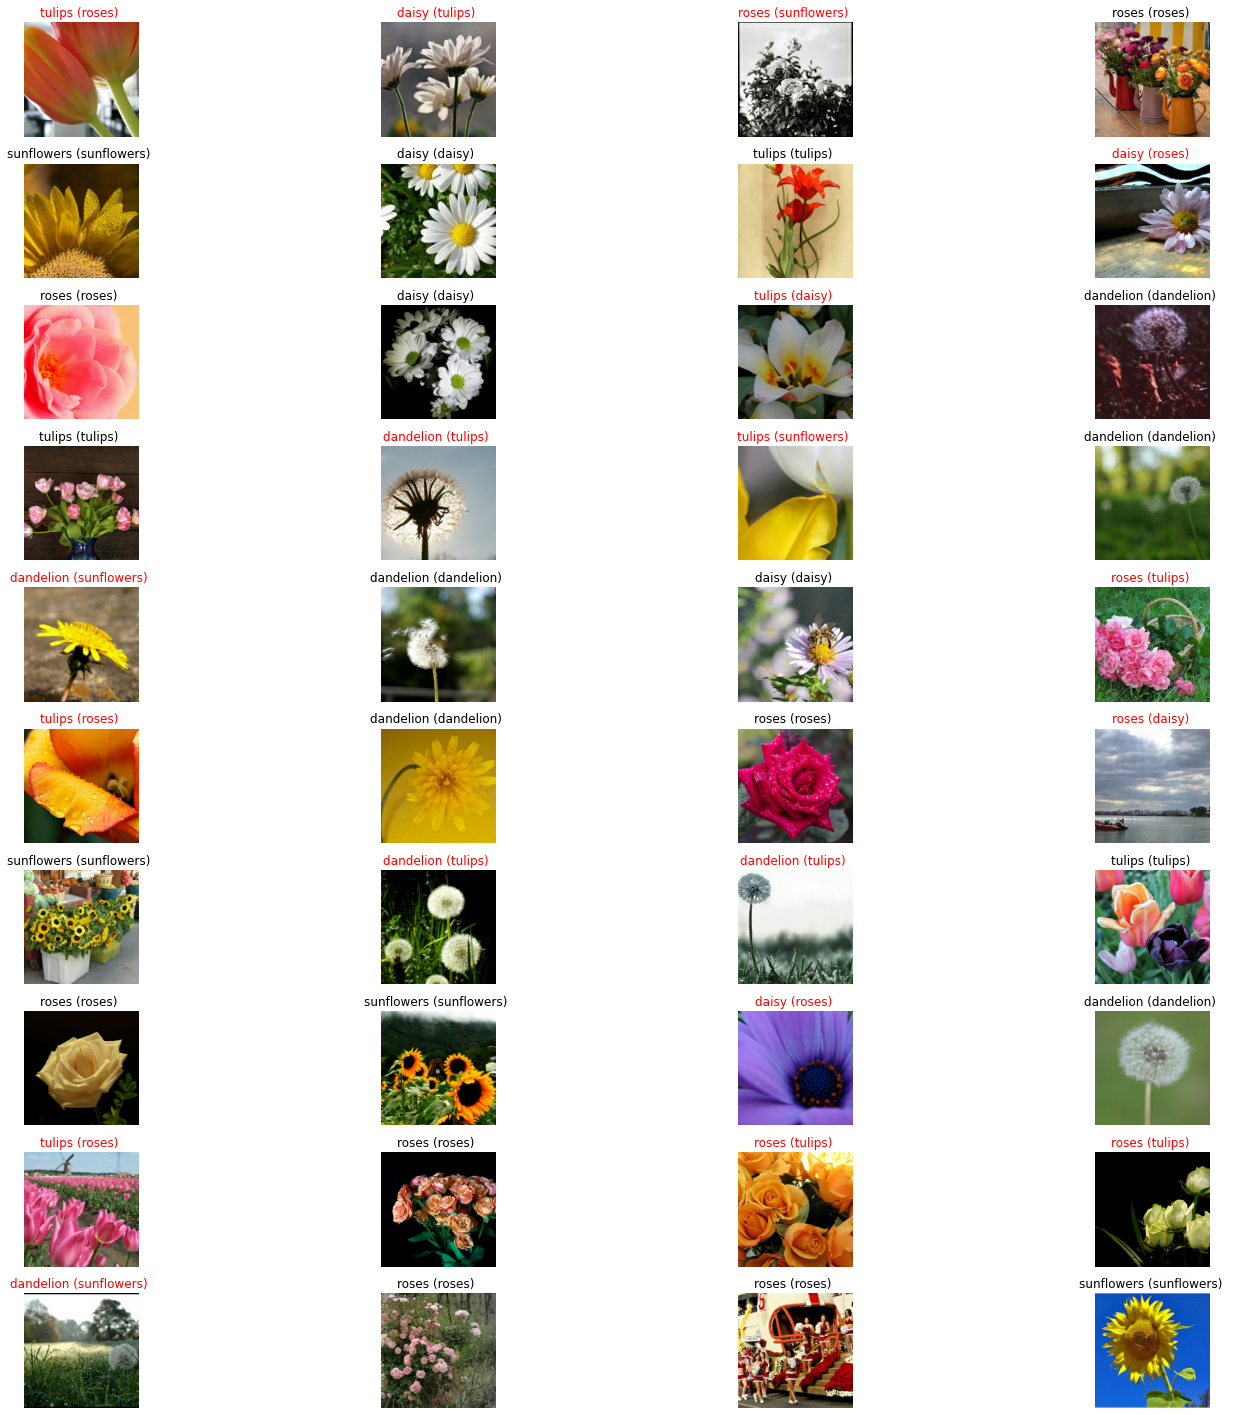

In [126]:
num_rows, num_cols = 10, 4
num_images = num_rows*num_cols
plt.figure(figsize=(20, 20))
display_test(images, labels, num_images, num_rows,
             num_cols, CLASSES, pred_40)